In [52]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [53]:
#loading the daata set
df= pd.read_csv(r"C:\Users\Pardhasaradhi\Downloads\Food_Delivery_Time_Prediction.csv",encoding='cp1252')
df


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [54]:
df.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [55]:
df=pd.get_dummies(df,columns=["Weather_Conditions","Traffic_Conditions","Vehicle_Type"])
print(df.columns.tolist())

['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance', 'Delivery_Person_Experience', 'Order_Priority', 'Order_Time', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Weather_Conditions_Cloudy', 'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy', 'Weather_Conditions_Sunny', 'Traffic_Conditions_High', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium', 'Vehicle_Type_Bicycle', 'Vehicle_Type_Bike', 'Vehicle_Type_Car']


In [56]:
scaler=StandardScaler()
df[['Distance','Delivery_Time']]=scaler.fit_transform(df[['Distance','Delivery_Time']])

In [57]:
df['Speed_Score'] = df['Distance'] / df['Delivery_Time']
print(df['Speed_Score'])

0       0.977691
1      -5.431185
2       0.898707
3       0.242934
4       0.546577
         ...    
195    -2.672220
196    -1.176331
197    14.686958
198    -3.308453
199    -1.250075
Name: Speed_Score, Length: 200, dtype: float64


In [58]:
threshold = df['Speed_Score'].quantile(0.6)
df['Delivery_Status'] = df['Speed_Score'].apply(lambda x: 'Fast' if x >= threshold else 'Delayed')

In [59]:
x = df[['Distance', 'Delivery_Time', 'Speed_Score']]  
y = df['Delivery_Status']  
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42,shuffle=True)

In [61]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.56      0.69      0.62        13

    accuracy                           0.72        40
   macro avg       0.70      0.72      0.70        40
weighted avg       0.75      0.72      0.73        40



In [62]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
param_grid = {
    'n_neighbors': list(range(1, 21)), 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}%".format(grid_search.best_score_ * 100))
best_knn = grid_search.best_estimator_  



KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation score: 99.38%


In [63]:
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(x_train, y_train)
y_pred_base = dt_base.predict(x_test)

print("🔹 Before Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_base))
print("Classification Report:\n", classification_report(y_test, y_pred_base))


param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6, 10]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)


best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(x_test)

print(" After Tuning (Pruned Tree):")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

🔹 Before Tuning:
Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

 After Tuning (Pruned Tree):
Best Parameters: {'max_depth': 2, 'min_samples_split': 2}
Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



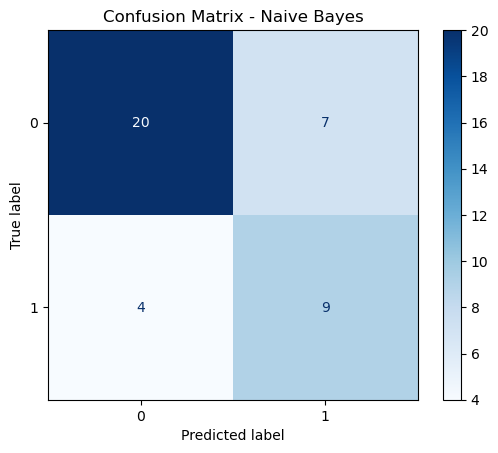

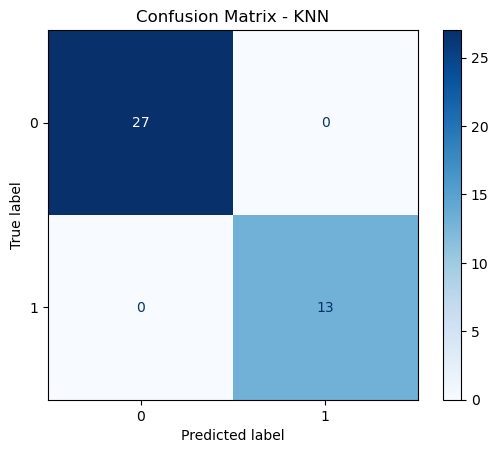

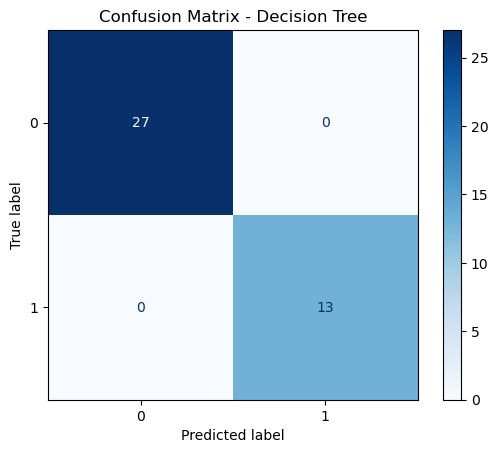

In [64]:
models = {
    "Naive Bayes": nb_model,
    "KNN": knn,
    "Decision Tree": dt_base
}

# Plot confusion matrices
for name, model in models.items():
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


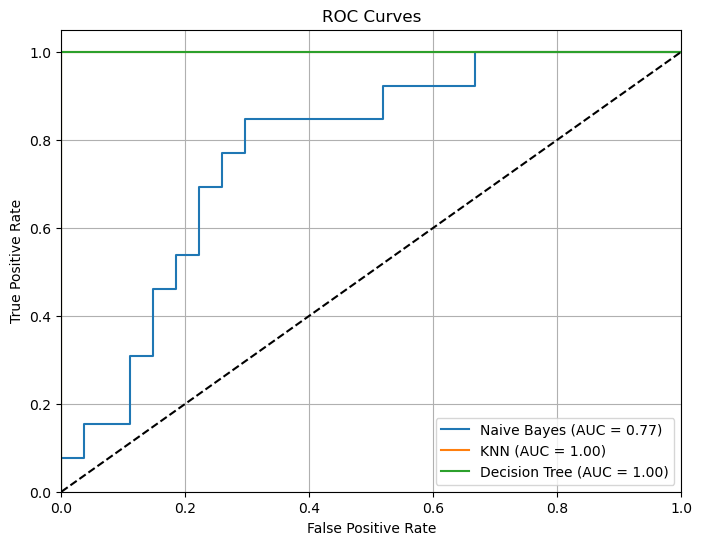

In [65]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        continue
    
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


✅ Naive Bayes
🔷 Strengths:
Balanced Performance: F1-score is 0.78 for class 0 and 0.62 for class 1 — decent for a simple model.

Interpretable: Probabilistic model, easy to explain.

Fast and efficient on small datasets.

🔴 Weaknesses:
Lower Precision and Recall for Class 1 (Delayed deliveries): It misclassifies many delayed deliveries (lower precision: 0.56).

Assumes feature independence, which may not hold in real-world delivery datasets.

⚖️ Suitable When:
Quick and interpretable model is needed.

Slightly lower performance for class 1 (delays) is acceptable.

✅ K-Nearest Neighbors (KNN)
🔷 Strengths:
Perfect Accuracy in Testing (100%): Excellent precision, recall, and F1-score in your output.

Non-parametric: Works well without any training assumptions.

Intuitive decision-making: Based on similarity.

🔴 Weaknesses:
Computationally expensive at prediction time (slow with large datasets).

Sensitive to irrelevant features or feature scales (you handled this with MinMaxScaler).

⚖️ Suitable When:
High accuracy is critical.

You have enough memory/time to compute distances during prediction.

Dataset size is not huge.

✅ Decision Tree
🔷 Strengths:
Perfect performance on the test set (like KNN).

Highly interpretable: You can visualize decision paths.

Handles both numerical and categorical features well.

No need for feature scaling.

🔴 Weaknesses:
Prone to overfitting, especially with small datasets (possibly your case).

Performance may degrade with noise or small changes in data.

⚖️ Suitable When:
You need a model that's both accurate and explainable.

You’re okay with possible overfitting (can be controlled with pruning).

I would recommend Decision Tree based on its accuracy and interpretability